# Linear transformations in 2D and 3D

## Numpy.matrix
 A [matrix](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) is a specialized 2-D array that retains its 2-D nature through operations.
 
### Example: matrix - vector multiplication

In [1]:
T = np.matrix([[1, 2], [3, 4]])
v=np.array([1,1])

In [2]:
T

matrix([[1, 2],
        [3, 4]])

In [3]:
v

array([1, 1])

In [4]:
T.dot(v)

matrix([[3, 7]])

## Linear transfromations in 2D
We can use matrices to express linear transformations of  
2D sets of points (or any object). Typical transformations are reflection, rotation or scaling, see [Examples of linear transformation matrices](https://en.wikipedia.org/wiki/Linear_map). Let's implement a framework to experiment with such linear maps. 

In [16]:
%pylab nbagg
n=10
points=[[cos(2*pi*t/n),sin(2*pi*t/n)] for t in range(n)]

Populating the interactive namespace from numpy and matplotlib


In [17]:
array(points).T[0]

array([ 1.        ,  0.80901699,  0.30901699, -0.30901699, -0.80901699,
       -1.        , -0.80901699, -0.30901699,  0.30901699,  0.80901699])

In [18]:
x=array(points).T[0]; y=array(points).T[1]

<IPython.core.display.Javascript object>


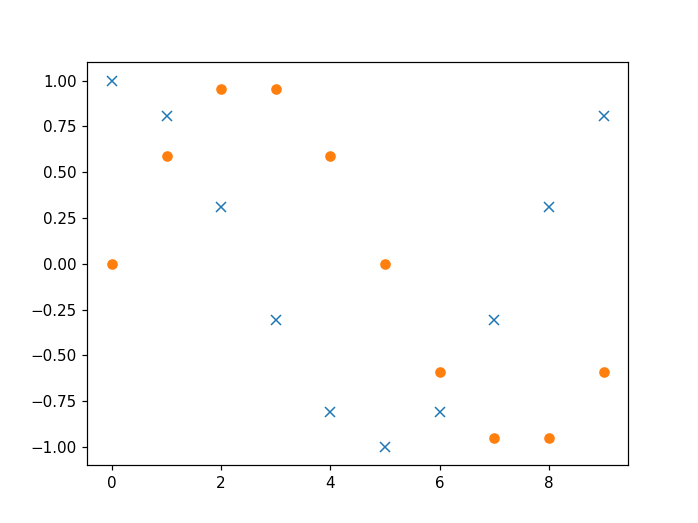

In [19]:
ifig=10;close(ifig);figure(ifig)
plot(x,'x')
plot(y,'o')

<IPython.core.display.Javascript object>


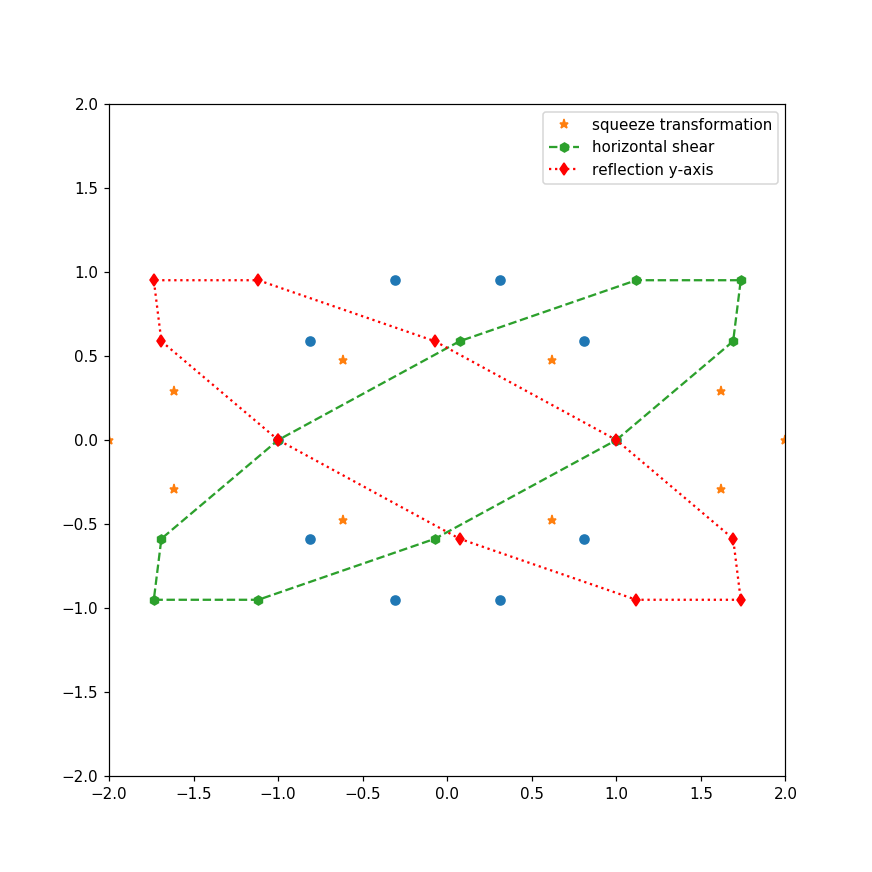

(-2, 2)

In [21]:
ifig=1;close(ifig);figure(ifig,figsize=(8,8))
plot(x,y,'o')
xlim(-2,2);ylim(-2,2)

In [22]:
# squeeze mapping:
T1 = matrix([[2,0],[0,1./2]])
T1

matrix([[ 2. ,  0. ],
        [ 0. ,  0.5]])

In [23]:
# turn into array of tupples
vecs=array(points)

In [24]:
# example output
T1.dot(vecs[3]).A1  # .A1 return flattened ndarray

array([-0.61803399,  0.47552826])

In [25]:
# transformation:
T = T1
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
xt=array(trans_vec).T[0]; yt=array(trans_vec).T[1]

# plot
ifig=1;figure(ifig)
plot(xt,yt,'*',label='squeeze transformation')
legend()

In [26]:
# horizontal shear mapping
T2 = matrix([[1,1.5],[0,1]])

In [27]:
T = T2

# transformation:
# vecs = trans_vec  # uncomment - result of previous trans is input for next
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)
trans_vec.append(trans_vec[0])
# transpose to make plotable arrays
xt=array(trans_vec).T[0]; yt=array(trans_vec).T[1]

# plot
ifig=1;figure(ifig)
plot(xt,yt,'h--',label="horizontal shear")
legend()

In [28]:
# reflection against y-axis
T3 = matrix([[-1,0],[0,1]])

In [29]:
T = T3

# transformation:
vecs = trans_vec   # uncomment - result of previous trans is input for next
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
xt=array(trans_vec).T[0]; yt=array(trans_vec).T[1]

# plot
ifig=1;figure(ifig)
plot(xt,yt,'rd:',label="reflection y-axis")
legend()

## 3D transformations

* We would like to extend the concept of transformations to 3D.
* As an example we first _draw_ a cube by creating an array that has points distributed along the eight edges of a cube.

### Iterators, array building

* For this we will look at a couple of array manipulation methods in numpy, such as 
    * [numpy.roll](https://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html)
    * [numpy.ravel](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html)
    * [numpy.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape)
* and at iterators

### Building a cube

In [30]:
n=10
c=1.
pencil = linspace(-c/2.,c/2.,n)
upper = 0.5 * ones(n)
lower = -0.5 + zeros(n)

In [31]:
upper

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5])

In [32]:
line = array([pencil,lower,upper])
# reshape to have points list needed for transformation
one_edge = reshape(line.ravel(order='F'),(n,3))

In [33]:
# how to build all of the edges?
dummy_sides = []
r=['u','l']
for j in r:
    for k in r:
        dummy_sides.append(['p',j,k])

In [34]:
dummy_sides

[['p', 'u', 'u'], ['p', 'u', 'l'], ['p', 'l', 'u'], ['p', 'l', 'l']]

In [36]:
# and the other_dummy_sides
for this in dummy_sides:
    for i in [1,2]:
        print(roll(array(this),i))

['u' 'p' 'u']
['u' 'u' 'p']
['l' 'p' 'u']
['u' 'l' 'p']
['u' 'p' 'l']
['l' 'u' 'p']
['l' 'p' 'l']
['l' 'l' 'p']


In [37]:
cube_sides = []
r=[upper,lower]
for j in r:
    for k in r:
        cube_sides.append([pencil,j,k])

In [38]:
# but first add sides with pencil in y and z coordinate
other_cube_sides=[]
for this in cube_sides:
    for i in [1,2]:
        other_cube_sides.append(roll(array(this),i,axis=0))

In [39]:
# each of these sides have to be reshaped to be an array of 3D points
reshape(array(cube_sides[0]).ravel(order='F'),(n,3))

array([[-0.5       ,  0.5       ,  0.5       ],
       [-0.38888889,  0.5       ,  0.5       ],
       [-0.27777778,  0.5       ,  0.5       ],
       [-0.16666667,  0.5       ,  0.5       ],
       [-0.05555556,  0.5       ,  0.5       ],
       [ 0.05555556,  0.5       ,  0.5       ],
       [ 0.16666667,  0.5       ,  0.5       ],
       [ 0.27777778,  0.5       ,  0.5       ],
       [ 0.38888889,  0.5       ,  0.5       ],
       [ 0.5       ,  0.5       ,  0.5       ]])

In [40]:
cube_sides_points = []
for this in cube_sides+other_cube_sides:
    cube_sides_points.append(reshape(array(this).ravel(order='F'),(n,3)))

In [41]:
%pylab nbagg
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [42]:
def transp(points):
    return array(points).T[0], array(points).T[1], array(points).T[2]

In [43]:
cube_vecs = reshape(array(cube_sides_points),(12*n,3))

In [44]:
x, y, z = transp(cube_vecs)

<IPython.core.display.Javascript object>


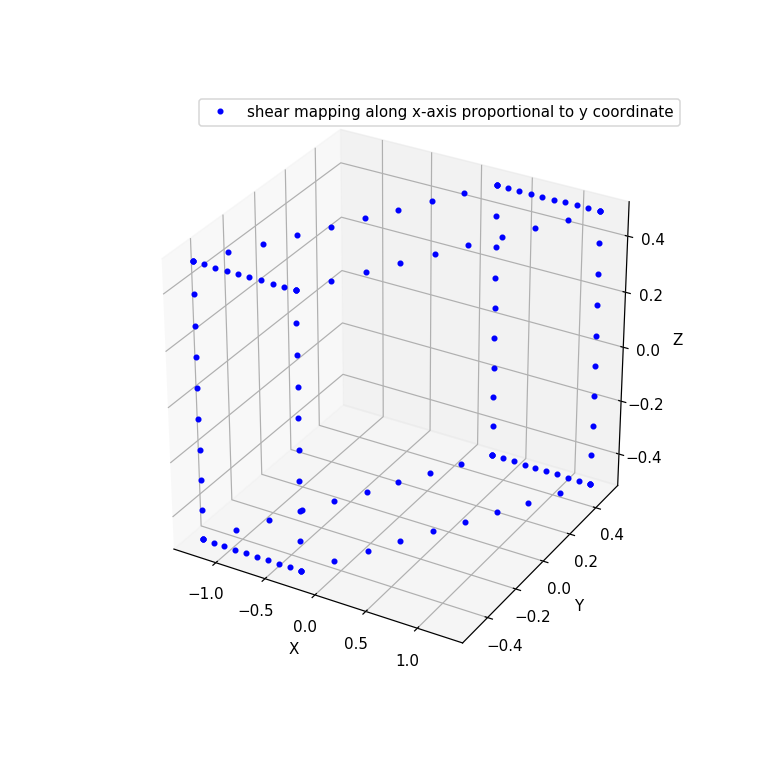

In [48]:
fig = figure(figsize=(7,7))
#this_label='helix'
#this_label='rotate $\pi/4$ counter-clockwise about x-axis '
this_label='shear mapping along x-axis proportional to y coordinate'
#this_label='cube'
ax = fig.gca(projection='3d')
ax.plot(x, y, z, '.b',label=this_label)
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [46]:
# shear mapping y-direction
sy = 1.5
T1 = matrix([[1,sy,0],[0,1,0],[0,0,1],])

In [47]:
vecs = cube_vecs
T = T1
# transformation:
trans_vec = []
for i in range(len(vecs)):
    this_tv = T.dot(vecs[i]).A1
    trans_vec.append(this_tv)

# transpose to make plotable arrays
x, y, z = transp(trans_vec)

# now plot again